In [1]:
import jieba
import json
import pandas as pd
import numpy as np

In [2]:
# 把字串全形轉半形

def strQ2B(ustring):
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # 全形空格直接轉換
                inside_code = 32
            elif (inside_code >= 65281 and inside_code <= 65374):  # 全形字元（除空格）根據關係轉化
                inside_code -= 65248
            rstring += chr(inside_code)
        ss.append(rstring)
    return ''.join(ss)

In [3]:
# 設定繁體字典位置 & 加上擴充字典位置
jieba.set_dictionary('jieba_data/user_dict.txt.big')
jieba.load_userdict('jieba_data/user_dict.txt')

Building prefix dict from E:\vscode\DATATHON\jieba_data\user_dict.txt.big ...
Loading model from cache C:\Users\BIGDAT~1\AppData\Local\Temp\jieba.u8fd90345872779659700e672017ba5ce.cache
Loading model cost 0.973 seconds.
Prefix dict has been built successfully.


In [4]:
# 載入資料

df = pd.read_csv('data/news_sampleData.csv')

,channel,media,title,author,datetime_publish,url
0,news,經濟日報,資策會估台灣半導體有望年增1.7% 優於全球表現,張建中,2020-06-01 13:00:00,https://money.udn.com/money/story/5612/4605129
1,news,經濟日報,對流雲系發展旺盛 15縣市大雨特報,余曉涵,2020-06-01 13:00:00,https://money.udn.com/money/story/5621/4605130
2,news,公視新聞網,彰化一度疫情重災 結合科技迅速查到感染源,"賴淑敏,蔣龍祥",2020-06-01 13:00:00,https://news.pts.org.tw/article/481090
3,news,公視新聞網,推林下經濟 台東林管處輔導部落養蜂,章明哲,2020-06-01 13:00:00,https://news.pts.org.tw/article/481093
4,news,公視新聞網,中市違停無障礙.親子車格 檢舉逾600件,"黃千容,彭煥群",2020-06-01 13:00:00,https://news.pts.org.tw/article/481091


In [49]:
# text_list = df['title'].values.tolist()

# m1 = map(lambda s : s.strip("\u3000|\n"),text_list)
# m2 = map(lambda s : s.replace("\u3000",""),m1)
# text_list = map(lambda s : strQ2B(s),m2)
# print(text_list)

In [30]:
# 資料轉半形

text_list = df['title'].values.tolist()
text_list_strQ2B = []
for text in text_list:
    if type(text) is int:
        continue
    else:
        text_list_strQ2B.append(strQ2B(text.strip()))
print(text_list_strQ2B)

['資策會估台灣半導體有望年增1.7% 優於全球表現', '對流雲系發展旺盛  15縣市大雨特報', '彰化一度疫情重災 結合科技迅速查到感染源', '推林下經濟 台東林管處輔導部落養蜂', '中市違停無障礙.親子車格 檢舉逾600件', '明公布振興券實施內容 傳納外配與中配', '醫療口罩買賣解禁 指揮中心下午2點說明', '出刊32年走入歷史 聯合晚報明起停刊', '幕後花絮曝光驚人秘密!54歲金喜愛被公開穿「XS號」神話:只能跪了', '退避權入法 台南率先舉行消防訓練講習', '世界環境日前夕 環團籲速成立環境資源部', '港股早盤勁揚.亞股跟進 台股開高走高', '聲援佛洛伊德 桑喬進球脫衣秀字吃黃牌', '高市1特教師遭檢舉不適任 申請介聘遭拒', '花生收成期遇連日大雨 雲林災損近5成', '對流雲系發展旺盛 氣象局對北北基15縣市發大雨特報', '聯晚明停刊!周玉蔻曾任採訪主任…曝建議轉型卻被她說一句', 'GCTF5週年 台美日三方發表聯合聲明', '佛洛伊德之死在美抗議頻傳,Google 決議延期發表 Android 11 Beta', '胡蘿蔔吃太多會中毒?食藥署揭真相', '夏季電價啟動 每戶每月平均多410元', '北市今宣布各場館解封 校園仍暫緩開放', '台中舊市場倉庫深夜大火 26攤位受波及', '胡蘿蔔吃太多會中毒?食藥署揭真相', '各地高溫炎熱夏季電價今啟動', 'BLACKPINK成員ROSÉ×LISA×JISOO 確定陸續發行SOLO歌曲', '乳癌檢測新進展!日本神戶大學研發一滴眼淚驗出癌細胞', '新婚嫩妻3度出軌 遭夫抓姦竟辯:想玩男人', '胡蘿蔔吃太多會中毒?食藥署揭真相', '見縫插針!美動亂中國隔岸觀火 央視:美政客「報應」來了', '胡蘿蔔吃太多會中毒?食藥署揭真相', '美中情局解密文件:蔣孝嚴為蔣經國之子', '6/1 口罩解禁!四大超商、家樂福、愛買、好市多 7 家通路販售方式懶人包', '後疫情時代 新加坡成立辦事處力推數位轉型', '對流雲系發展旺盛  15縣市大雨特報', 'Samsung 的新一代 Galaxy Watch 被發現在 FCC 出現', '傷心、傷腦、還傷體重!10個行動步驟打倒嗜糖壞習慣', '對流雲系發展旺盛 氣象局對北北基15縣市發大雨特報', '搶救國旅超前部署 專家建議

In [31]:
# 精確模式分詞 (cut_all=False)
seg_result_list = []
for text in text_list:
    seg_result = jieba.cut(text, cut_all=False)
    seg_result_list.extend(list(seg_result))
print(seg_result_list)

['資策', '會', '估台灣', '半導體', '有望', '年增', '1.7%', ' ', '優於', '全球', '表現', '對流雲', '系', '發展', '旺盛', ' ', ' ', '15', '縣市', '大雨', '特報', '彰化', '一度', '疫情', '重災', ' ', '結合', '科技', '迅速', '查', '到', '感染', '源', '推', '林下', '經濟', ' ', '台', '東林', '管處', '輔導', '部落', '養蜂', '中市', '違停', '無障礙', '.', '親子', '車格', ' ', '檢舉', '逾', '600', '件', '明', '公布', '振興', '券', '實施', '內容', ' ', '傳納', '外配', '與', '中配', '醫療', '口罩', '買賣', '解禁', ' ', '指揮中心', '下午', '2', '點', '說明', '出刊', '32', '年', '走入', '歷史', ' ', '聯合晚報', '明', '起', '停刊', '幕後', '花絮', '曝光', '驚人', '秘密', '！', '54', '歲', '金喜愛', '被', '公開', '穿', '「', 'XS', '號', '」', '神話', '：', '只能', '跪', '了', '退避', '權', '入法', ' ', '台南', '率先', '舉行', '消防', '訓練', '講習', '世界', '環境', '日', '前夕', ' ', '環團籲速', '成立', '環境', '資源', '部', '港股', '早盤', '勁揚', '.', '亞股', '跟進', ' ', '台股', '開高', '走高', '聲援', '佛洛伊德', ' ', '桑喬', '進球', '脫衣秀', '字', '吃', '黃牌', '高市', '1', '特', '教師', '遭', '檢舉', '不適', '任', ' ', '申請', '介聘', '遭拒', '花生', '收成', '期遇', '連日', '大雨', ' ', '雲林', '災損', '近', '5', '成', '對流雲', '系', '發展', '旺盛', '\u300

In [32]:
#停用字
with open(file='jieba_data/simple_stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
print(len(stop_words))

99


In [33]:
# 經停用字選出結果

seg_stop_result_list = []
for text in text_list:
    if type(text) is int:
        continue
    else:
        seg_result = jieba.cut(text, cut_all=False)
        for term in seg_result:
            if term not in stop_words and term != ' ':
                seg_stop_result_list.append(term)
print(seg_stop_result_list)

['資策', '會', '估台灣', '半導體', '有望', '年增', '1.7%', '優於', '全球', '表現', '對流雲', '系', '發展', '旺盛', '15', '縣市', '大雨', '特報', '彰化', '一度', '疫情', '重災', '結合', '科技', '迅速', '查', '到', '感染', '源', '推', '林下', '經濟', '台', '東林', '管處', '輔導', '部落', '養蜂', '中市', '違停', '無障礙', '親子', '車格', '檢舉', '逾', '600', '件', '明', '公布', '振興', '券', '實施', '內容', '傳納', '外配', '中配', '醫療', '口罩', '買賣', '解禁', '指揮中心', '下午', '點', '說明', '出刊', '32', '年', '走入', '歷史', '聯合晚報', '明', '起', '停刊', '幕後', '花絮', '曝光', '驚人', '秘密', '54', '歲', '金喜愛', '被', '公開', '穿', 'XS', '號', '神話', '只能', '跪', '退避', '權', '入法', '台南', '率先', '舉行', '消防', '訓練', '講習', '世界', '環境', '日', '前夕', '環團籲速', '成立', '環境', '資源', '部', '港股', '早盤', '勁揚', '亞股', '跟進', '台股', '開高', '走高', '聲援', '佛洛伊德', '桑喬', '進球', '脫衣秀', '字', '吃', '黃牌', '高市', '特', '教師', '遭', '檢舉', '不適', '任', '申請', '介聘', '遭拒', '花生', '收成', '期遇', '連日', '大雨', '雲林', '災損', '近', '成', '對流雲', '系', '發展', '旺盛', '\u3000', '氣象局', '對北北基', '15', '縣市', '發', '大雨', '特報', '聯', '晚明', '停刊', '周玉蔻', '曾任', '採訪', '主任', '…', '曝', '建議', '轉型', '卻', '被', '她', '說'

In [34]:
print(len(seg_result_list))
print(len(seg_stop_result_list))

6737
4844


In [35]:
# 確認各字詞數量

from collections import Counter
seg_counter = Counter(seg_result_list)
#seg_counter.most_common()

In [40]:
# 確認各字詞數量，取前10

from collections import Counter
seg_counter = Counter(seg_stop_result_list)
seg_counter.most_common(20)

[('\u3000', 30),
 ('疫情', 23),
 ('問卦', 23),
 ('被', 21),
 ('在', 20),
 ('後', 17),
 ('新聞', 16),
 ('遭', 15),
 ('時代', 15),
 ('不', 15),
 ('大', 15),
 ('人', 15),
 ('閒聊', 15),
 ('美國', 14),
 ('月', 14),
 ('中國', 13),
 ('解封', 12),
 ('為', 12),
 ('我', 12),
 ('新', 12)]

In [41]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [42]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_stop_result_list)

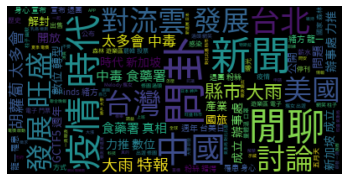

In [43]:
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
print(seg_counter['不'])

15
